# Лабораторная работа №3

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.


In [1]:
import sys
sys.path
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('world_population.csv')

### Основные характеристики датасета

In [3]:
# Выведем первые 5 строк из выбранного датасета.
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 234
Всего колонок: 17


In [5]:
# Выведем список колонок с типами данных.
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

### Проверка на пустые значения в датасете

In [6]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

Rank - 0
CCA3 - 0
Country/Territory - 0
Capital - 0
Continent - 0
2022 Population - 0
2020 Population - 0
2015 Population - 0
2010 Population - 0
2000 Population - 0
1990 Population - 0
1980 Population - 0
1970 Population - 0
Area (km²) - 0
Density (per km²) - 0
Growth Rate - 0
World Population Percentage - 0


In [7]:
# Проверка на пропущенные данные
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

### Диаграмма рассеяния

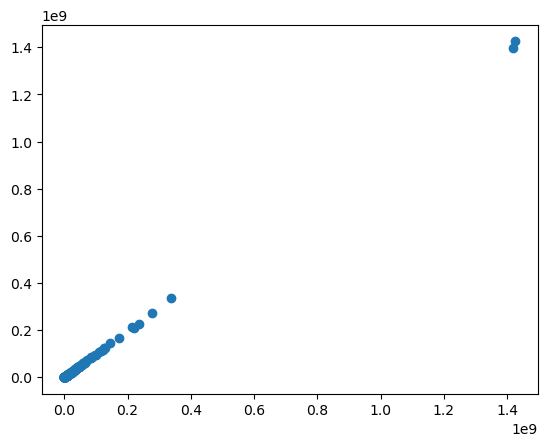

In [10]:
plt.scatter(df['2022 Population'],df['2020 Population'])

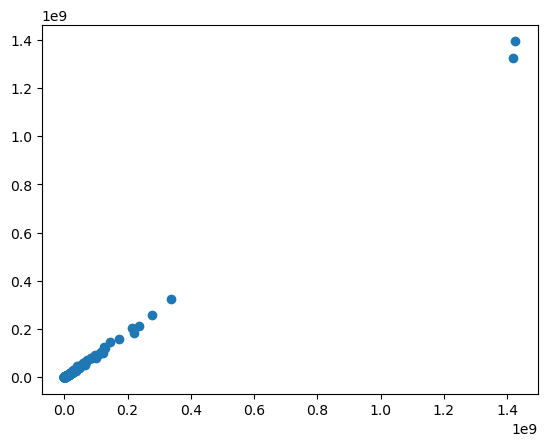

In [11]:
plt.scatter(df['2022 Population'],df['2015 Population'])

In [12]:
X = df[['2020 Population', '2015 Population']]
Y = df['2022 Population']

In [13]:
# Выведем по оси абсцисс. 
X

,2020 Population,2015 Population
0,38972230,33753499
1,2866849,2882481
2,43451666,39543154
3,46189,51368
4,77700,71746
...,...,...
229,11655,12182
230,556048,491824
231,32284046,28516545
232,18927715,16248230


In [14]:
# Выведем по оси ординат. 
Y

0      41128771
1       2842321
2      44903225
3         44273
4         79824
         ...   
229       11572
230      575986
231    33696614
232    20017675
233    16320537
Name: 2022 Population, Length: 234, dtype: int64

### Разделение выборки на обучающую и тестовую

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
# Вернет 80% от общего размера данных
len(X_train)

187

In [18]:
len(X_test)

47

In [19]:
X_train

,2020 Population,2015 Population
63,117190911,102471895
228,96648685,92191398
127,370391,383515
168,5702174,5064386
182,35997107,32749848
...,...,...
164,38428366,38553146
70,301920,291787
45,5123105,4895242
88,10121763,9294505


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [21]:
X_train

,2020 Population,2015 Population
142,12315,11185
154,5379839,5190356
1,2866849,2882481
2,43451666,39543154
61,1329444,1314657
...,...,...
64,3747,3408
15,1477469,1362142
228,96648685,92191398
125,515357,456579


In [22]:
# Используем нашу модель линейной регресии
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [23]:
# Обучим нашу модель
clf.fit(X_train,Y_train)

LinearRegression()

In [24]:
clf.predict(X_test)

array([2.67584650e+06, 1.41955496e+05, 1.73167846e+07, 3.73306870e+07,
       3.98481314e+05, 9.37076269e+04, 1.12060338e+07, 2.25562519e+07,
       6.92104771e+04, 3.67852427e+05, 2.18059424e+08, 2.72532496e+07,
       7.13662758e+07, 7.20587662e+04, 5.30485005e+06, 3.41971951e+05,
       1.32520130e+06, 6.29740369e+06, 1.15911986e+07, 7.37238105e+05,
       2.15231466e+06, 2.17365410e+05, 1.73887010e+06, 1.81245673e+07,
       6.58509601e+05, 4.70694541e+07, 6.41934879e+07, 1.22641554e+07,
       5.45551387e+06, 8.63469854e+06, 1.16353204e+07, 2.37695752e+07,
       3.85903898e+07, 9.88362991e+07, 1.28760964e+06, 4.92590489e+04,
       1.15538212e+08, 1.23048836e+08, 2.13611722e+07, 1.23182214e+08,
       6.64545566e+06, 4.70622756e+06, 4.46112366e+05, 2.63110708e+05,
       3.56989765e+07, 2.12949370e+06, 4.18415921e+05])

In [25]:
Y_test

26       2630296
210       106858
183     17316449
138     37457971
127       367507
78         56466
47      11212191
124     22593590
176        31791
130       326101
149    218541212
227     28301696
206     71697030
180        33660
114      5302681
70        306279
129      1299469
58       6336392
87      11584996
119       695168
190      2119844
175       179857
59       1674908
56      18001000
136       627082
198     46874204
68      64626628
24      12224110
189      5643453
186      8605718
19      11655930
203     23893394
35      38454327
55      99010212
49       1251488
173        10967
163    115559009
102    123951692
202     22125249
63     123379924
109      6630623
155      4576298
20        405272
181       227380
5       35588987
152      2093599
91        372899
Name: 2022 Population, dtype: int64

In [26]:
# Означает, что точность составляет 99%
clf.score(X_test,Y_test)

0.9999633273400184

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train.describe()

,2020 Population,2015 Population
count,187.000000,187.000000
mean,0.025031,0.024345
std,0.105401,0.103739
min,0.000000,0.000000
25%,0.000297,0.000294
50%,0.003775,0.003633
75%,0.013621,0.013126
max,1.000000,1.000000


### Обучение KNN с произвольным k

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [30]:
def print_metrics(Y_test, Y_pred):
    print(f"R^2: {r2_score(Y_test, Y_pred)}")
    print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")

In [31]:
def print_cv_result(cv_model, X_test, Y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(Y_test, cv_model.predict(X_test))
    print()

In [32]:
base_k = 7
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(X_train, Y_train)
Y_pred_base = base_knn.predict(X_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(Y_test, Y_pred_base)

Test metrics for KNN with k=7

R^2: 0.9775593132072161
MSE: 42984187842339.65
MAE: 2427398.1762917927


### Кросс-валидация

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(X_train, Y_train)
        print_cv_result(knn_cv, X_test, Y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.9906506734328223
Лучший параметр: {'n_neighbors': 1}
Метрики на тестовом наборе
R^2: 0.9960340462145656
MSE: 7596616986872.681
MAE: 1217833.6170212766

Оптимизация метрики neg_mean_squared_error: -50386986573844.67
Лучший параметр: {'n_neighbors': 1}
Метрики на тестовом наборе
R^2: 0.9960340462145656
MSE: 7596616986872.681
MAE: 1217833.6170212766

Оптимизация метрики neg_mean_absolute_error: -2164595.715647226
Лучший параметр: {'n_neighbors': 1}
Метрики на тестовом наборе
R^2: 0.9960340462145656
MSE: 7596616986872.681
MAE: 1217833.6170212766

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.9822247986476296
Лучший параметр: {'n_neighbors': 1}
Метрики на тестовом наборе
R^2: 0.9960340462145656
MSE: 7596616986872.681
MAE: 1217833.6170212766

Оптимизация метрики neg_mean_squared_error: -51410300165699.664
Лучший параметр: {'n_neighbors': 1}
Метрики на тестовом наборе
R^2: 0.9960340462145656
MSE: 7596616986872.68

In [35]:
best_k = 4
Y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, Y_train).predict(X_test)

### Сравнение исходной и оптимальной модели

In [36]:
print('Basic model\n')
print_metrics(Y_test, Y_pred_base)
print('_______________________')
print('\nOptimal model\n')
print_metrics(Y_test, Y_pred_best)

Basic model

R^2: 0.9775593132072161
MSE: 42984187842339.65
MAE: 2427398.1762917927
_______________________

Optimal model

R^2: 0.9859450055984543
MSE: 26921748209299.1
MAE: 1937184.25


### Визуализация оптимальной модели

In [37]:
res = pd.DataFrame({'Y_test': Y_test, 'Y_pred_best': Y_pred_best}).sort_values(by='Y_test')
res.head()

,Y_test,Y_pred_best
173,10967,10353.50
176,31791,34937.50
180,33660,34937.50
78,56466,52553.75
210,106858,105159.00
